### Keras Sequencial Model
- A sequential model is a linear stack of layers.
- Stacking convolution layers one above the other. 

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG 

In [ ]:
import numpy as np

In [ ]:
import livelossplot
plot_losses=livelossplot.PlotLossesKeras()

%matplotlib inline 

NUM_ROWS=28
NUM_COLS=28
NUM_CLASSES=10
BATCH_SIZE=128
EPOCHS=10

In [ ]:
def data_summary(X_train,y_train,X_test,y_test):
  '''Summarize current state of dataset'''
  print('Train images shape :',X_train.shape)
  print('Train labels shape :',y_train.shape)
  print('Test images shape :',X_test.shape)
  print('Test labels shape :',y_test.shape)
  print('Train labels :',y_train)
  print('Test labels :',y_test)

In [ ]:
# Load data
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Check state of dataset
data_summary(X_train,y_train,X_test,y_test)

11490434/11490434 [==============================] - 2s 0us/step
Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape : (10000, 28, 28)
Test labels shape : (10000,)
Train labels : [5 0 4 ... 5 6 8]
Test labels : [7 2 1 ... 4 5 6]


In [ ]:
# Reshape data
X_train=X_train.reshape(X_train.shape[0],NUM_ROWS * NUM_COLS)
X_train=X_train.astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],NUM_ROWS * NUM_COLS)
X_test=X_test.astype('float32')/255

In [ ]:
# Categorically encode labels
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)

In [ ]:
# Check the dataset
data_summary(X_train,y_train,X_test,y_test)

Train images shape : (60000, 784)
Train labels shape : (60000, 10)
Test images shape : (10000, 784)
Test labels shape : (10000, 10)
Train labels : [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels : [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Build neural networks
model=Sequential()

model.add(Dense(512,activation='relu',input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

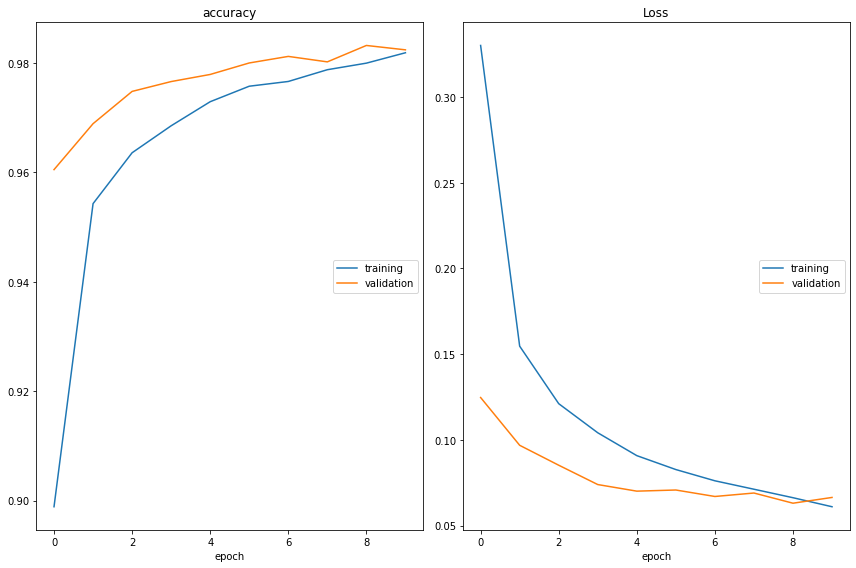

accuracy
	training         	 (min:    0.899, max:    0.982, cur:    0.982)
	validation       	 (min:    0.961, max:    0.983, cur:    0.982)
Loss
	training         	 (min:    0.061, max:    0.330, cur:    0.061)
	validation       	 (min:    0.063, max:    0.125, cur:    0.066)
469/469 [==============================] - 3s 6ms/step - loss: 0.0611 - accuracy: 0.9819 - val_loss: 0.0665 - val_accuracy: 0.9824
Test loss : 0.06647390872240067
Test accuracy : 0.9824000000953674


In [ ]:
# Compile model
model.compile(optimizer= "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=BATCH_SIZE, 
          epochs=EPOCHS, 
          verbose=1, 
          callbacks=[plot_losses], 
          validation_data=(X_test, y_test))

score=model.evaluate(X_test, y_test,verbose=0)
print('Test loss :',score[0])
print('Test accuracy :',score[1])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m=model.keys()
print(m)

plt.plot(m['accuracy'])
plt.plot(m['validation_accuracy'])
plt.show()

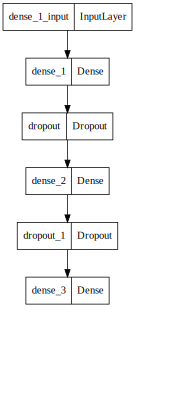

In [ ]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [ ]:
# Prediction
prediction=model.predict_classes(X_test,y_test)
prediction[100]

### Prediction

https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

### Keras Functional Composition
- Functional composition models are created via the functional API.
- Functional composition makes it possible to create complex models, such as acylic graphs, or multi-output models.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import Input
from keras.utils import to_categorical,plot_model
from keras.layers import *
from keras import optimizers

In [ ]:
def data_summary(X_train,y_train,X_test,y_test):
  '''Summarize current state of dataset'''
  print('Train images shape :',X_train.shape)
  print('Train labels shape :',y_train.shape)
  print('Test images shape :',X_test.shape)
  print('Test labels shape :',y_test.shape)
  print('Train labels :',y_train)
  print('Test labels :',y_test)

In [ ]:
# Load data
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Check state of dataset
data_summary(X_train,y_train,X_test,y_test)

Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape : (10000, 28, 28)
Test labels shape : (10000,)
Train labels : [5 0 4 ... 5 6 8]
Test labels : [7 2 1 ... 4 5 6]


In [ ]:
# Reshape data
NUM_ROWS=28
NUM_COLS=28
NUM_CLASSES=10

X_train=X_train.reshape(X_train.shape[0],NUM_ROWS * NUM_COLS)
X_train=X_train.astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],NUM_ROWS * NUM_COLS)
X_test=X_test.astype('float32')/255

In [ ]:
# Categorically encode labels
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)

In [ ]:
# Check the dataset
data_summary(X_train,y_train,X_test,y_test)

Train images shape : (60000, 784)
Train labels shape : (60000, 10)
Test images shape : (10000, 784)
Test labels shape : (10000, 10)
Train labels : [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels : [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Input parameters
n_input=784 # number of features
n_hidden_1=300
n_hidden_2=100
n_hidden_3=100
n_hidden_4=200
num_digits=10

In [ ]:
# Model 1
from os import name
Inp=Input(shape=(784,))  # input layer
x=Dense(n_hidden_1,activation='relu',name='Hidden_Layer_1')(Inp)
x=Dense(n_hidden_2,activation='relu',name='Hidden_Layer_2')(x)
x=Dense(n_hidden_3,activation='relu',name='Hidden_Layer_3')(x)
x=Dense(n_hidden_4,activation='relu',name='Hidden_Layer_4')(x)
output=Dense(num_digits,activation='softmax',name='Output_Layer')(x)

In [ ]:
# Our model would have 6 layers - input layer, 4 hidden layers and output layer
model=Model(Inp,output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297,910
Trainable params: 297,910
Non-trainab

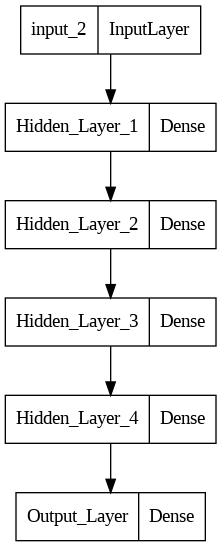

In [ ]:
# Output network visualization
plot_model(model)

In [ ]:
# Insert hyperparameter
learning_rate=0.1
epochs=20
batch_size=100
sgd=optimizers.SGD(lr=learning_rate)

In [ ]:
# Compile model
model.compile(optimizer= "sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model 1
histort1=model.fit(X_train, y_train, batch_size=batch_size, 
          epochs=epochs, 
          verbose=2, 
          validation_data=(X_test, y_test))

Epoch 1/20
600/600 - 3s - loss: 1.2662 - accuracy: 0.6758 - val_loss: 0.4813 - val_accuracy: 0.8664 - 3s/epoch - 5ms/step
Epoch 2/20
600/600 - 2s - loss: 0.3975 - accuracy: 0.8871 - val_loss: 0.3150 - val_accuracy: 0.9075 - 2s/epoch - 3ms/step
Epoch 3/20
600/600 - 2s - loss: 0.3046 - accuracy: 0.9125 - val_loss: 0.2654 - val_accuracy: 0.9232 - 2s/epoch - 4ms/step
Epoch 4/20
600/600 - 2s - loss: 0.2614 - accuracy: 0.9244 - val_loss: 0.2310 - val_accuracy: 0.9322 - 2s/epoch - 3ms/step
Epoch 5/20
600/600 - 2s - loss: 0.2310 - accuracy: 0.9328 - val_loss: 0.2233 - val_accuracy: 0.9325 - 2s/epoch - 3ms/step
Epoch 6/20
600/600 - 2s - loss: 0.2083 - accuracy: 0.9389 - val_loss: 0.1942 - val_accuracy: 0.9419 - 2s/epoch - 3ms/step
Epoch 7/20
600/600 - 2s - loss: 0.1893 - accuracy: 0.9460 - val_loss: 0.1810 - val_accuracy: 0.9467 - 2s/epoch - 3ms/step
Epoch 8/20
600/600 - 2s - loss: 0.1737 - accuracy: 0.9496 - val_loss: 0.1672 - val_accuracy: 0.9505 - 2s/epoch - 3ms/step
Epoch 9/20
600/600 - 2s 

In [ ]:
# Model 2
Inp=Input(shape=(784,))  # input layer
x=Dense(n_hidden_1,activation='relu',name='Hidden_Layer_1')(Inp)
x=Dense(n_hidden_2,activation='relu',name='Hidden_Layer_2')(x)
x=Dense(n_hidden_3,activation='relu',name='Hidden_Layer_3')(x)
x=Dense(n_hidden_4,activation='relu',name='Hidden_Layer_4')(x)
output=Dense(num_digits,activation='softmax',name='Output_Layer')(x)

#  We rely on Adam optimizer
adam=keras.optimizers.Adam(lr=learning_rate)
model2=Model(Inp,output)

# Compile Model 2
model2.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Model 2
histort2=model2.fit(X_train, y_train, batch_size=batch_size, 
          epochs=epochs, 
          verbose=2, 
          validation_data=(X_test, y_test))

Epoch 1/20
600/600 - 4s - loss: 0.2592 - accuracy: 0.9220 - val_loss: 0.1125 - val_accuracy: 0.9658 - 4s/epoch - 7ms/step
Epoch 2/20
600/600 - 2s - loss: 0.0971 - accuracy: 0.9701 - val_loss: 0.1120 - val_accuracy: 0.9657 - 2s/epoch - 3ms/step
Epoch 3/20
600/600 - 2s - loss: 0.0654 - accuracy: 0.9791 - val_loss: 0.0849 - val_accuracy: 0.9747 - 2s/epoch - 4ms/step
Epoch 4/20
600/600 - 2s - loss: 0.0475 - accuracy: 0.9845 - val_loss: 0.0672 - val_accuracy: 0.9797 - 2s/epoch - 3ms/step
Epoch 5/20
600/600 - 2s - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.0767 - val_accuracy: 0.9784 - 2s/epoch - 3ms/step
Epoch 6/20
600/600 - 2s - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0791 - val_accuracy: 0.9771 - 2s/epoch - 3ms/step
Epoch 7/20
600/600 - 2s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0756 - val_accuracy: 0.9785 - 2s/epoch - 3ms/step
Epoch 8/20
600/600 - 2s - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0800 - val_accuracy: 0.9788 - 2s/epoch - 3ms/step
Epoch 9/20
600/600 - 2s 

In [ ]:
# Model 3 - Changing Learning Rate
Inp=Input(shape=(784,))  # input layer
x=Dense(n_hidden_1,activation='relu',name='Hidden_Layer_1')(Inp)
x=Dense(n_hidden_2,activation='relu',name='Hidden_Layer_2')(x)
x=Dense(n_hidden_3,activation='relu',name='Hidden_Layer_3')(x)
x=Dense(n_hidden_4,activation='relu',name='Hidden_Layer_4')(x)
output=Dense(num_digits,activation='softmax',name='Output_Layer')(x)

learning_rate=0.01
adam=keras.optimizers.Adam(lr=learning_rate)
model3=Model(Inp,output)

# Compile Model 3
model3.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
histort3=model3.fit(X_train, y_train, batch_size=batch_size, 
          epochs=epochs, 
          verbose=2, 
          validation_data=(X_test, y_test))

Epoch 1/20
600/600 - 3s - loss: 0.2579 - accuracy: 0.9221 - val_loss: 0.1170 - val_accuracy: 0.9628 - 3s/epoch - 6ms/step
Epoch 2/20
600/600 - 2s - loss: 0.0993 - accuracy: 0.9695 - val_loss: 0.0842 - val_accuracy: 0.9735 - 2s/epoch - 3ms/step
Epoch 3/20
600/600 - 2s - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0789 - val_accuracy: 0.9761 - 2s/epoch - 3ms/step
Epoch 4/20
600/600 - 2s - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.0704 - val_accuracy: 0.9782 - 2s/epoch - 3ms/step
Epoch 5/20
600/600 - 2s - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0875 - val_accuracy: 0.9747 - 2s/epoch - 4ms/step
Epoch 6/20
600/600 - 2s - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0702 - val_accuracy: 0.9805 - 2s/epoch - 3ms/step
Epoch 7/20
600/600 - 2s - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0726 - val_accuracy: 0.9791 - 2s/epoch - 3ms/step
Epoch 8/20
600/600 - 2s - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0868 - val_accuracy: 0.9759 - 2s/epoch - 3ms/step
Epoch 9/20
600/600 - 2s 

In [ ]:
# Model 4 - Adding Dropout layer
Inp=Input(shape=(784,))  # input layer
x=Dense(n_hidden_1,activation='relu',name='Hidden_Layer_1')(Inp)
x=Dropout(0.3)(x)
x=Dense(n_hidden_2,activation='relu',name='Hidden_Layer_2')(x)
x=Dropout(0.3)(x)
x=Dense(n_hidden_3,activation='relu',name='Hidden_Layer_3')(x)
x=Dropout(0.3)(x)
x=Dense(n_hidden_4,activation='relu',name='Hidden_Layer_4')(x)
output=Dense(num_digits,activation='softmax',name='Output_Layer')(x)

learning_rate=0.01
adam=keras.optimizers.Adam(lr=learning_rate)
model4=Model(Inp,output)

# Compile Model 4
model4.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
histort4=model4.fit(X_train, y_train, batch_size=batch_size, 
          epochs=epochs, 
          verbose=2, 
          validation_data=(X_test, y_test),
          validation_steps=2)

Epoch 1/20
600/600 - 3s - loss: 0.4440 - accuracy: 0.8635 - val_loss: 0.1280 - val_accuracy: 0.9604 - 3s/epoch - 6ms/step
Epoch 2/20
600/600 - 2s - loss: 0.1834 - accuracy: 0.9477 - val_loss: 0.1041 - val_accuracy: 0.9692 - 2s/epoch - 3ms/step
Epoch 3/20
600/600 - 2s - loss: 0.1398 - accuracy: 0.9597 - val_loss: 0.0930 - val_accuracy: 0.9733 - 2s/epoch - 4ms/step
Epoch 4/20
600/600 - 2s - loss: 0.1211 - accuracy: 0.9659 - val_loss: 0.0836 - val_accuracy: 0.9749 - 2s/epoch - 3ms/step
Epoch 5/20
600/600 - 2s - loss: 0.1033 - accuracy: 0.9707 - val_loss: 0.0810 - val_accuracy: 0.9778 - 2s/epoch - 3ms/step
Epoch 6/20
600/600 - 2s - loss: 0.0940 - accuracy: 0.9724 - val_loss: 0.0971 - val_accuracy: 0.9731 - 2s/epoch - 3ms/step
Epoch 7/20
600/600 - 2s - loss: 0.0859 - accuracy: 0.9750 - val_loss: 0.0768 - val_accuracy: 0.9785 - 2s/epoch - 3ms/step
Epoch 8/20
600/600 - 2s - loss: 0.0786 - accuracy: 0.9770 - val_loss: 0.0776 - val_accuracy: 0.9790 - 2s/epoch - 3ms/step
Epoch 9/20
600/600 - 2s 

In [ ]:
test_pred=pd.DataFrame(model4.predict(X_test,batch_size=200))
test_pred=pd.DataFrame(test_pred.idxmax(axis=1))
test_pred.index.name='Image_Id'
test_pred=test_pred.rename(columns={0:'Label'}).reset_index()
test_pred['Image_Id']=test_pred['Image_Id'] + 1

test_pred.head()

50/50 [==============================] - 0s 2ms/step


,Image_Id,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4


### Tuning the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
  classifier=Sequential()
  classifier.add(Dense(units=6,kernal_initializer='uniform',activation='relu',input_dim=11))
  classifier.add(Dense(units=6,kernal_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=1,kernal_initializer='uniform',activation='sigmoid'))
  classifier.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier=KerasClassifier(build_fn=build_classifier)

parameters={
    'batch_size':[25,32],
    'epochs':[1,2],
    'optimizer':['adam','rmsprop']}

grid_search=GridSearchCV(estimator=classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10)

grid_search=grid_search.fit(X_train,y_train)

best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_          

### Data Augmentation - adding some noise to image to get better result

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory('dataset/training_set',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')
test_set=train_datagen.flow_from_directory('dataset/test_set',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')

### Pre-Processing

In [ ]:
def preprocessing(x,y):
  x=tf.cast(x,tf.float32)/255.0
  y=tf.cast(y,tf.int64)
  return x,y

def create_dataset(xs,ys,n_classes=10):
  ys=tf.ohe_hot(ys,depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs,ys))

training_data=create_dataset(X_train,y_test)
val_data=create_dataset(X_test,y_test)